#### 2. Trips based on precipitation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML
from IPython.display import display, HTML
display(HTML(""))
import scienceplots
plt.style.use(['science', 'no-latex'])
from statistics import mean

In [2]:
# import prepared data set
df_la = pd.read_csv("prepared_data.csv", parse_dates=["start_time","end_time","Date"],low_memory=False)
df_weather = pd.read_csv("prepared_data_weather.csv", parse_dates=["date_time"],low_memory=False)

In [3]:
df_la.tail(1)

Unnamed: 0          start_time            end_time  start_station_id  \
283134      290341 2019-12-31 23:58:52 2020-01-01 00:25:27              3074   

        end_station_id bike_id    user_type start_station_name  \
283134            3049   19053  Annual Pass     Hope & Olympic   

       end_station_name  duration       Date  Day  Month  Weekday  Hour  \
283134   2nd & Figueroa      26.0 2019-12-31   31     12        1    23   

        Day_of_year  
283134          365

In [4]:
#df_weather["hour"]= df_weather["date_time"].apply(lambda x: x.hour)
#df_weather["day"]= df_weather["date_time"].apply(lambda x: x.day)
df_weather.head(3)

Unnamed: 0           date_time  max_temp  min_temp  precip    year  temp
0       35040 2019-01-01 01:00:00      15.6      15.6     0.0  2019.0  15.6
1       35041 2019-01-01 02:00:00      15.0      15.0     0.0  2019.0  15.0
2       35042 2019-01-01 03:00:00      15.0      15.0     0.0  2019.0  15.0

In [5]:
# getting number of trips per hour
def get_trips_hour(datetime):
    return df_la[(df_la["Month"] == datetime.month) & (df_la["Day"] == datetime.day) & (df_la["Hour"] == datetime.hour)].size

In [6]:
df_weather["num_trips_hour"] = df_weather["date_time"].apply(get_trips_hour)
#df_weather["hour"] = df_weather.index

In [7]:
# getting number of trips per day
def get_trips_day(datetime):
    return df_la[(df_la["Month"] == datetime.month) & (df_la["Day"] == datetime.day)].size

In [8]:
df_weather["num_trips_day"] = df_weather["date_time"].apply(get_trips_day)

In [9]:
df_weather.head(5)

Unnamed: 0           date_time  max_temp  min_temp  precip    year  temp  \
0       35040 2019-01-01 01:00:00      15.6      15.6     0.0  2019.0  15.6   
1       35041 2019-01-01 02:00:00      15.0      15.0     0.0  2019.0  15.0   
2       35042 2019-01-01 03:00:00      15.0      15.0     0.0  2019.0  15.0   
3       35043 2019-01-01 04:00:00      13.9      13.9     0.0  2019.0  13.9   
4       35044 2019-01-01 05:00:00      12.2      12.2     0.0  2019.0  12.2   

   num_trips_hour  num_trips_day  
0             128           8080  
1             256           8080  
2              32           8080  
3               0           8080  
4               0           8080

### per hour

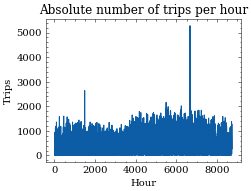

In [10]:
# Overview trips per hour of year
plt.plot(df_weather.index, df_weather["num_trips_hour"], label='Trips per hour')
plt.title('Absolute number of trips per hour')
plt.ylabel('Trips')
plt.xlabel('Hour')
plt.show()

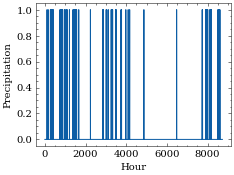

In [11]:
# Overview precipitation per hour of year
plt.plot(df_weather.index, df_weather["precip"], label='Precipitation per hour with 1 = precipitation and 0 = no precipitation')
plt.ylabel('Precipitation')
plt.xlabel('Hour')
plt.show()

In [12]:
# number of hours without and with precipitation
precip_count_hour = df_weather["precip"].value_counts()
df = precip_count_hour.to_frame().rename(columns = {'precip': 'count_hour'})
df['precip'] = df.index
df.reset_index(drop=True, inplace=True) 
df

count_hour  precip
0        8476     0.0
1         256     1.0

Text(0.5, 1.0, 'Hours with and without precipitation with 0 = no precipitation and 1 = precipitation')

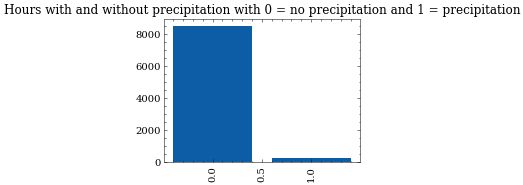

In [13]:
# number of hours without and with precipitation
fig, ax = plt.subplots()
plt.setp(ax.xaxis.get_majorticklabels(),rotation=90,fontsize=10)
ax.bar(df["precip"], df["count_hour"])
plt.title('Hours with and without precipitation with 0 = no precipitation and 1 = precipitation')

In [14]:
# Mean of number of trips when precipitation
hours_with_precip = df_weather[df_weather["precip"] == 1]
mean(hours_with_precip["num_trips_hour"])

350.125

In [15]:
# Mean of numbers of trips when no precipitation
hours_without_precip = df_weather[df_weather["precip"] == 0]
mean(hours_without_precip["num_trips_hour"])

522.8900424728646

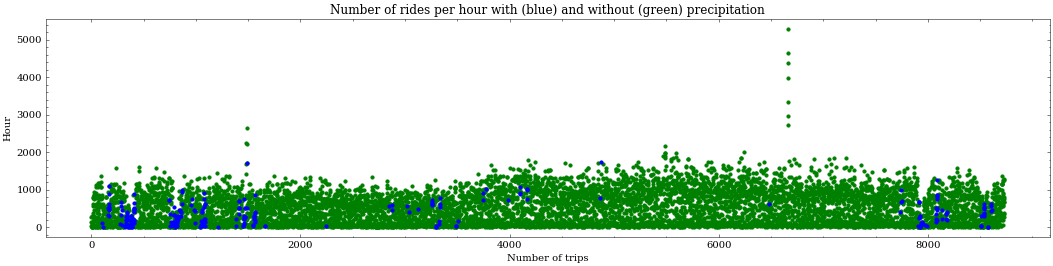

In [16]:
# number of rides per hour with and without precipitation
plt.figure(figsize = (18,4))
plt.scatter(hours_without_precip.index, hours_without_precip["num_trips_hour"], color = 'g', s=10)
plt.scatter(hours_with_precip.index, hours_with_precip["num_trips_hour"], color = 'b', s=10)
plt.xlabel("Number of trips")
plt.ylabel("Hour")
plt.title("Number of rides per hour with (blue) and without (green) precipitation")
plt.show()

In [17]:
#f, axes = plt.subplots(figsize=(18, 4))
#sns.barplot(x = "hour", y= "num_trips",data=df_weather)
#plt.show()

### per day

In [18]:
# per day
df_weather_res = df_weather.resample("D", on="date_time").agg({'max_temp':'max', 'min_temp': 'min','precip':'sum'})
df_weather_res["day_of_year"] = df_weather_res.index.to_series().apply(lambda x:x.dayofyear)
df_weather_res.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2019-01-01 to 2019-12-31
Freq: D
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   max_temp     365 non-null    float64
 1   min_temp     365 non-null    float64
 2   precip       365 non-null    float64
 3   day_of_year  365 non-null    int64  
dtypes: float64(3), int64(1)
memory usage: 14.3 KB


In [19]:
df_weather_res.head(3)

max_temp  min_temp  precip  day_of_year
date_time                                          
2019-01-01      16.7       6.1     0.0            1
2019-01-02      16.1       4.4     0.0            2
2019-01-03      18.3       7.8     0.0            3

In [20]:
df_weather_res.tail(3)

max_temp  min_temp  precip  day_of_year
date_time                                          
2019-12-29      16.7       8.3     0.0          363
2019-12-30      17.8      11.7     0.0          364
2019-12-31      22.8      10.6     0.0          365

In [21]:
weather_trips_day = df_la.merge(df_weather_res, right_on=df_weather_res["day_of_year"], left_on=df_la["Day_of_year"], how="left")
weather_trips_day.head(3)

key_0  Unnamed: 0          start_time            end_time  \
0      1           0 2019-01-01 00:07:00 2019-01-01 00:14:00   
1      1           1 2019-01-01 00:08:00 2019-01-01 00:14:00   
2      1           2 2019-01-01 00:18:00 2019-01-01 00:50:00   

   start_station_id  end_station_id bike_id user_type start_station_name  \
0              3046            3051   06468   Walk-up         2nd & Hill   
1              3046            3051   12311   Walk-up         2nd & Hill   
2              3030            3075   05992   Walk-up         Main & 1st   

  end_station_name  ...       Date Day  Month  Weekday  Hour  Day_of_year  \
0   7th & Broadway  ... 2019-01-01   1      1        1     0            1   
1   7th & Broadway  ... 2019-01-01   1      1        1     0            1   
2   Broadway & 9th  ... 2019-01-01   1      1        1     0            1   

   max_temp  min_temp  precip  day_of_year  
0      16.7       6.1     0.0            1  
1      16.7       6.1     0.0            1  
2      16.7       6.1     0.0            1  

[3 rows x 21 columns]

In [22]:
weather_trips_day.tail(3)

key_0  Unnamed: 0          start_time            end_time  \
283132    365      290339 2019-12-31 23:43:19 2019-12-31 23:47:41   
283133    365      290340 2019-12-31 23:48:17 2019-12-31 23:53:55   
283134    365      290341 2019-12-31 23:58:52 2020-01-01 00:25:27   

        start_station_id  end_station_id bike_id    user_type  \
283132              3051            3064   12298  Annual Pass   
283133              3064            3074   19053  Annual Pass   
283134              3074            3049   19053  Annual Pass   

       start_station_name end_station_name  ...       Date Day  Month  \
283132     7th & Broadway      Grand & 8th  ... 2019-12-31  31     12   
283133        Grand & 8th   Hope & Olympic  ... 2019-12-31  31     12   
283134     Hope & Olympic   2nd & Figueroa  ... 2019-12-31  31     12   

        Weekday  Hour  Day_of_year  max_temp  min_temp  precip  day_of_year  
283132        1    23          365      22.8      10.6     0.0          365  
283133        1    23          365      22.8      10.6     0.0          365  
283134        1    23          365      22.8      10.6     0.0          365  

[3 rows x 21 columns]

In [ ]:
#a=np.zeros(365)
#for i in range(length(df_weather)):
#    if df_weather["num_trips_day"] != df_weather["num_trips_day"]
#    a[] = la[la["Weekday"]==i].size

In [23]:
# number of rides depending on precipitation
la_precip = weather_trips_day["start_station_id"].groupby(pd.cut(weather_trips_day["precip"], np.arange(-0.5, max(weather_trips_day["precip"])+1, 0.5))).count()
la_precip.tail(3)

precip
(15.0, 15.5]      0
(15.5, 16.0]    343
(16.0, 16.5]      0
Name: start_station_id, dtype: int64

Text(0.5, 1.0, 'Number of trips depending on precipitation')

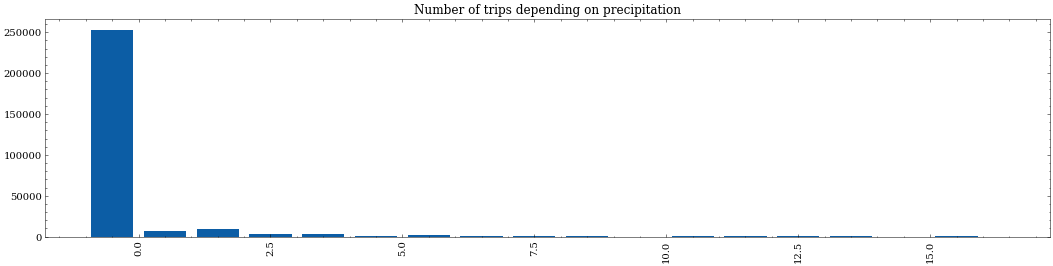

In [24]:
# number of rides depending on precipitation per day
fig, ax = plt.subplots(figsize=[18,4])
plt.setp(ax.xaxis.get_majorticklabels(),rotation=90,fontsize=10)
ax.bar(np.arange(-0.5,16.5,0.5), la_precip)
plt.title('Number of trips depending on precipitation')

In [25]:
la_precip = weather_trips_day["start_station_id"].groupby(pd.cut(weather_trips_day["precip"], np.arange(0, max(weather_trips_day["precip"])+1, 0.5))).count()
la_precip.tail(3)

precip
(15.0, 15.5]      0
(15.5, 16.0]    343
(16.0, 16.5]      0
Name: start_station_id, dtype: int64

Text(0.5, 1.0, 'Number of trips when precipitation')

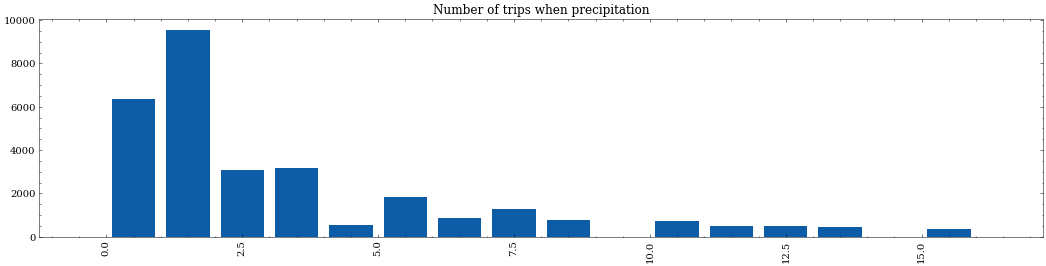

In [26]:
# number of rides when precipitation per day
fig, ax = plt.subplots(figsize=[18,4])
plt.setp(ax.xaxis.get_majorticklabels(),rotation=90,fontsize=10)
ax.bar(np.arange(0,16.5,0.5), la_precip)
plt.title('Number of trips when precipitation')